<a href="https://colab.research.google.com/github/awhitehouse1/DS4002-Project-2/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# below is code for EDA section of MI2 for Project 2

In [1]:
from google.colab import files
uploaded = files.upload()

# Load the dataset into a pandas dataframe
import pandas as pd
df = pd.read_excel('merged_covid_gdp_data (1).xlsx')

# Display the first few rows to verify the data
print(df.head())


Saving merged_covid_gdp_data (1).xlsx to merged_covid_gdp_data (1) (1).xlsx
  Country/Region       Date  Year  Deaths  GDP_per_Capita
0    Afghanistan 2020-01-22  2020       0      512.055098
1    Afghanistan 2020-01-23  2020       0      512.055098
2    Afghanistan 2020-01-24  2020       0      512.055098
3    Afghanistan 2020-01-25  2020       0      512.055098
4    Afghanistan 2020-01-26  2020       0      512.055098


In [2]:
# Check the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display the column names
print("Columns in the dataset:")
print(df.columns)

# Get basic information about the dataset (data types, non-null counts)
print("\nDataset Information:")
df.info()

# Get descriptive statistics of numerical columns
print("\nDescriptive statistics:")
print(df.describe())


Number of rows: 185928
Number of columns: 5
Columns in the dataset:
Index(['Country/Region', 'Date', 'Year', 'Deaths', 'GDP_per_Capita'], dtype='object')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185928 entries, 0 to 185927
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  185928 non-null  object        
 1   Date            185928 non-null  datetime64[ns]
 2   Year            185928 non-null  int64         
 3   Deaths          185928 non-null  int64         
 4   GDP_per_Capita  184055 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.1+ MB

Descriptive statistics:
                      Date           Year         Deaths  GDP_per_Capita
count               185928  185928.000000  185928.000000   184055.000000
mean   2021-01-21 12:00:00    2020.558743    7073.688030    22943.650111
min    2020-01-22 

In [6]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country/Region       0
Date                 0
Year                 0
Deaths               0
GDP_per_Capita    1873
dtype: int64


In [ ]:
# How do we want to deal with the 1,873 missing values in GDP_per_Capita column?
# We can remove them, fill them with the mean/median/placeholder

In [9]:
# Filter rows where 'GDP_per_Capita' is missing
missing_gdp_countries = df[df['GDP_per_Capita'].isnull()]

# Get the unique list of countries where GDP is missing
unique_countries = missing_gdp_countries['Country/Region'].unique()

# Display the unique countries
print("Unique countries where GDP per capita is missing:")
print(unique_countries)

Unique countries where GDP per capita is missing:
['Cuba' 'Eritrea' 'San Marino' 'South Sudan']


In [ ]:
# Cuba, Eritrea, San Marino, and South Sudan are missing GDP

In [ ]:
# They account for 1% of the data (1,873/185,928) so I am going to remove them

In [10]:
# Remove rows where 'GDP_per_Capita' is missing
df_cleaned = df.dropna(subset=['GDP_per_Capita'])

# Verify the number of rows remaining
print(f"Number of rows after removing missing GDP values: {df_cleaned.shape[0]}")

Number of rows after removing missing GDP values: 184055


In [ ]:
# Now our data set has 184,055 rows

In [ ]:
# Below I will explore some questions about our cleaned data set:

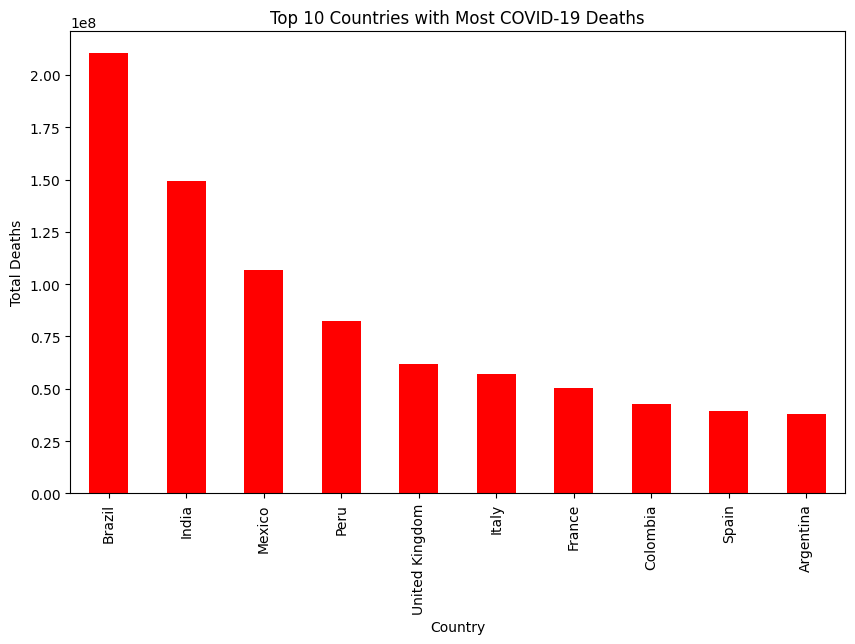

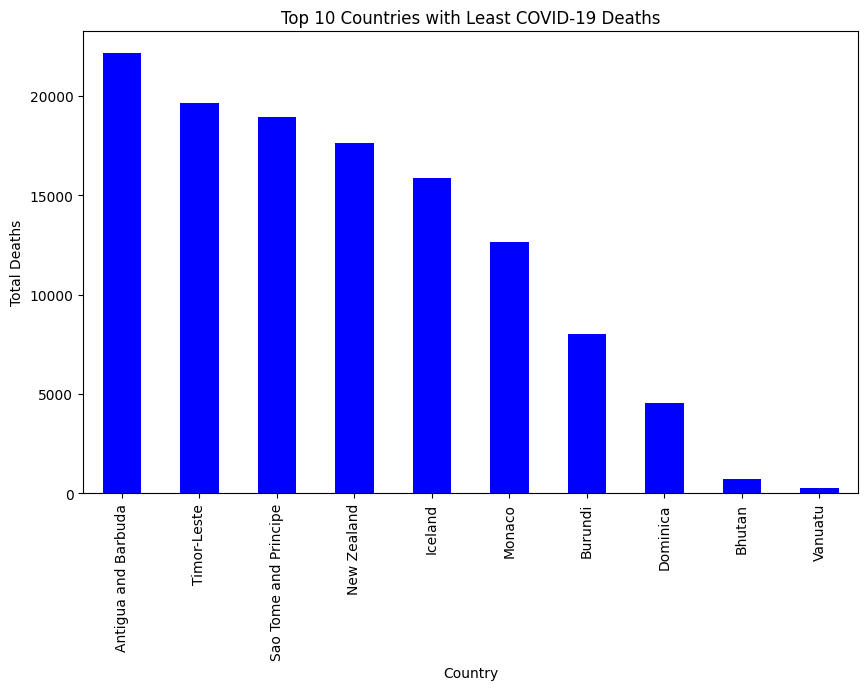

Countries with the least COVID-19 deaths:
Country/Region
Antigua and Barbuda      22135
Timor-Leste              19655
Sao Tome and Principe    18921
New Zealand              17607
Iceland                  15889
Monaco                   12634
Burundi                   8013
Dominica                  4538
Bhutan                     736
Vanuatu                    277
Name: Deaths, dtype: int64


In [12]:
# Question 1: Which countries have the most and least COVID-19 deaths?
import matplotlib.pyplot as plt

# Group by 'Country/Region' and sum 'Deaths'
country_deaths = df_cleaned.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)

# Top 10 countries with most deaths
top_10_countries = country_deaths.head(10)

# Countries with the least deaths (excluding zero deaths)
least_10_countries = country_deaths[country_deaths > 0].tail(10)

# Plot for top 10 countries with most deaths
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Most COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

# Plot for least 10 countries with most deaths
plt.figure(figsize=(10, 6))
least_10_countries.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Least COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

# Display countries with the least deaths
print("Countries with the least COVID-19 deaths:")
print(least_10_countries)



In [13]:
# Question 2: What is the average GDP per capita?
# Calculate the average GDP per capita
average_gdp_per_capita = df_cleaned['GDP_per_Capita'].mean()

print(f"The average GDP per capita is: {average_gdp_per_capita:.2f}")

The average GDP per capita is: 22943.65


In [15]:
# Question 3: What is the correlation between GDP and COVID deaths?
# Check the correlation between GDP per capita and COVID deaths
gdp_deaths_corr = df_cleaned['GDP_per_Capita'].corr(df_cleaned['Deaths'])
print(f"Correlation between GDP per capita and COVID-19 deaths: {gdp_deaths_corr:.2f}")

Correlation between GDP per capita and COVID-19 deaths: -0.05


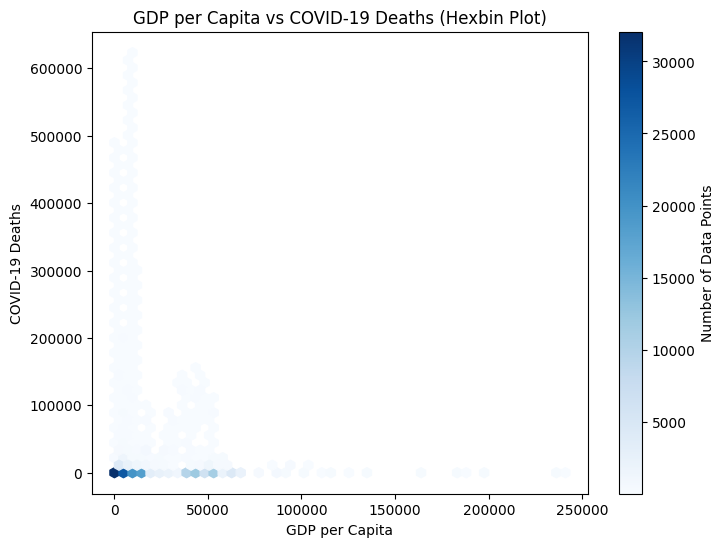

In [19]:
# Question 4: Do countries with high GDP per capita have high COVID-19 deaths?
# Hexbin plot for GDP per capita vs COVID-19 deaths
plt.figure(figsize=(8, 6))
plt.hexbin(df_cleaned['GDP_per_Capita'], df_cleaned['Deaths'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Data Points')
plt.title('GDP per Capita vs COVID-19 Deaths (Hexbin Plot)')
plt.xlabel('GDP per Capita')
plt.ylabel('COVID-19 Deaths')
plt.show()


<ipython-input-20-6ef0df3d692c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
<ipython-input-20-6ef0df3d692c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month
<ipython-input-20-6ef0df3d692c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

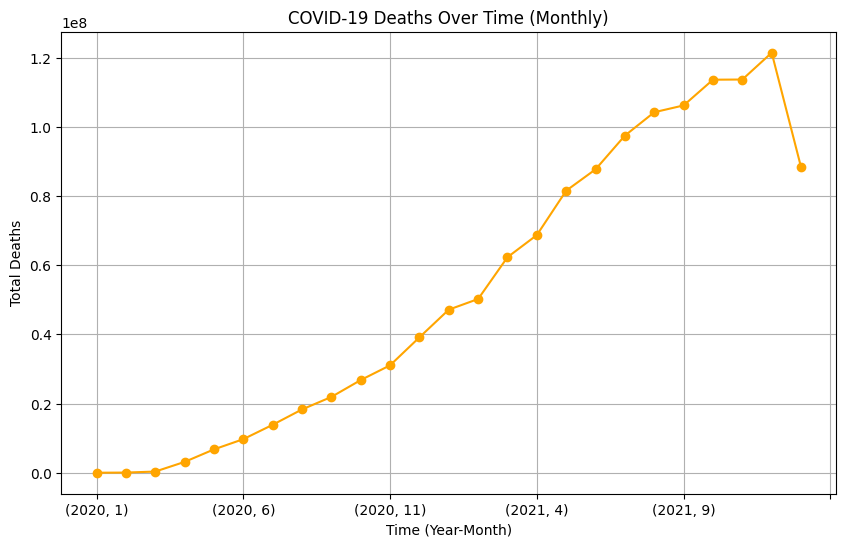

In [20]:
# Question 4: How do COVID-19 deaths change over time?
# Convert the 'Date' column to datetime format if it's not already
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Create 'Month' and 'Year' columns from the 'Date'
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Group by year and month to sum deaths
monthly_deaths = df_cleaned.groupby(['Year', 'Month'])['Deaths'].sum()

# Plot monthly deaths
monthly_deaths.plot(kind='line', figsize=(10, 6), color='orange', marker='o')
plt.title('COVID-19 Deaths Over Time (Monthly)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()
